# Various anomoly detection techniques

# Isolation Forest

In [4]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

I’m not importing any external dataset, rather creating a simple two dimensional numpy array with just one outlier as presented in the two-dimensional plot.

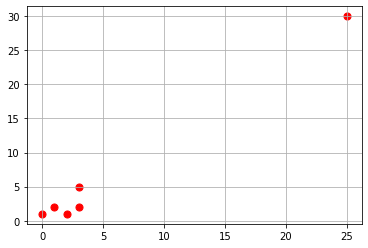

In [2]:
# dataset
X = np.array([[1, 2], [2, 1], [3, 2], [0, 1], [25, 30], [3, 5]])
# using just numpy array for visualization
plt.scatter(X[:,0], X[:,1], color = "r", s = 50)
plt.grid()

 Instantiate and fit model
 
Like most algorithms in the Scikit Learn library, instantiating and fitting the model takes only a couple of lines of code.
Two important parameters in building the model are n_estimators and contamination, the latter specifying the percentage of data to be identified as outliers.

In [4]:
# instantiate model
model = IsolationForest(n_estimators = 10)
# fit model
model.fit(X)

IsolationForest(n_estimators=10)

Prediction
When it comes to the prediction, the process involves showing the model a two-dimensional array and the model will spit out either 1 for normal data and -1 for an outlier.

In [7]:
# predict on new data 
new_data = np.array([[10, 15]])
model.predict(new_data)

array([-1])

Anomaly score
Like I said in the beginning, the algorithm uses anomaly scores as a metric, which represents an average anomaly score of the input sample.

In [8]:
# average anomaly score
model.decision_function(np.array(new_data))

array([-0.11472913])

# DBSCAN — a density-based unsupervised algorithm for fraud detection


Density-Based Spatial Clustering of Applications with Noise.

In [9]:
# data wrangling
import pandas as pd
# visualization
import matplotlib.pyplot as plt
# algorithm
from sklearn.cluster import DBSCAN

using the famous Iris dataset from an online source, so practice along without worrying about where to get the data from how to clean that up.

In [10]:
# import data
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Step 3: Modeling
The two most important parameter values the model takes are (i) esp, which specifies the distance between two points i.e., how close the data points should be to one another to be considered part of a cluster; and (ii) min_samples, which specifies the minimum number of neighbors a point should have in a cluster.

In [11]:
# input data
data = df[["sepal_length", "sepal_width"]]
# specify & fit model
model = DBSCAN(eps = 0.4, min_samples = 10).fit(data)

In [12]:
# visualize outputs
colors = model.labels_
plt.scatter(data["sepal_length"], data["sepal_width"], c = colors)

In [13]:
# outliers dataframe
outliers = data[model.labels_ == -1]
print(outliers)


     sepal_length  sepal_width
14            5.8          4.0
15            5.7          4.4
41            4.5          2.3
57            4.9          2.4
60            5.0          2.0
62            6.0          2.2
93            5.0          2.3
98            5.1          2.5
106           4.9          2.5
117           7.7          3.8
118           7.7          2.6
119           6.0          2.2
122           7.7          2.8
131           7.9          3.8
135           7.7          3.0


DBSCAN — a clustering-based unsupervised machine learning technique for fraud/outlier/anomaly detection. Its implementation can be as simple as taking just the five steps using thesklearn library. But of course, this is a simple demonstration of the concept. A real-world application would require much more experimentation to find the best model that works for a particular context and industry.

# LOF - Local Outlier Factor

implement LOF for anomaly detection in Python environment using Scikit-Learn library. Let’s first import the required libraries:

In [2]:

import seaborn as sns
# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor

In [5]:
#create a hypothetical dataset containing 5 data points.
# data
df = pd.DataFrame(np.array([[0,1], [1,1], [1,2], [2,2], [5,6]]), columns = ["x", "y"], index = [0,1,2,3,4])


If you plot the data points, finding out the outlier with visual inspection is not so difficult.

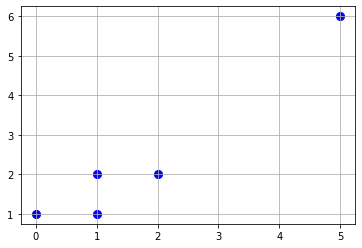

In [6]:
# plot data points
plt.scatter(df["x"], df["y"], color = "b", s = 65)
plt.grid()

So indeed, we don’t need a machine learning algorithm to find out that the 5th data point is an outlier. But let’s see if the algorithm can detect it.

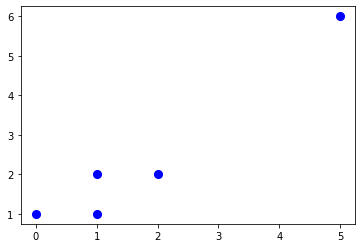

In [11]:
# model specification
model1 = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.02)
# model fitting
y_pred = model1.fit_predict(df)
# filter outlier index
outlier_index = where(y_pred == -1) # negative values are outliers and positives inliers
# filter outlier values
outlier_values = df.iloc[outlier_index]
# plot data
plt.scatter(df["x"], df["y"], color = "b", s = 65)

The purpose of this article was to introduce a density-based anomaly detection technique — Local Outlier Factor. LOF compares the density of a given data point to its neighbors and determines whether that data is normal or anomalous. The implementation of this algorithm is not too difficult thanks to the sklearn library. The interpretation of the results is also pretty straight forward.